In [2]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from scipy.optimize import curve_fit

In [3]:

allz ='../Compute_correlation/SpSh_angcor_RAcut_zcut_Agcut_2classification.txt'

'''
#Original files
highz = '../Compute_correlation/SpSh_angcor_40prob_pdf_highz.txt'
lowz = '../Compute_correlation/SpSh_angcor_40prob_pdf_lowz.txt'
ez ='../Compute_correlation/SpSh_angcor_allclass.txt'
acut='../Compute_correlation/SpSh_angcor_allclass4.txt'
'''
#Leave one out files
lowz = '../Compute_correlation/SpSh_angcor_obj1.txt'
highz = '../Compute_correlation/SpSh_angcor_obj2.txt'
ez ='../Compute_correlation/SpSh_angcor_allclass.txt'
acut='../Compute_correlation/SpSh_angcor_allclass4.txt'

allzJK ='../Compute_correlation/SpSh_angcor_RAcut_zcut_Agcut_2classification_JK.txt'

'''
#Original JK files
highzJK = '../Compute_correlation/SpSh_angcor_40prob_pdf_JK_highz.txt'
lowzJK = '../Compute_correlation/SpSh_angcor_40prob_pdf_JK_lowz.txt'
ezJK ='../Compute_correlation/SpSh_angcor_allclass_JK.txt'
acutJK='../Compute_correlation/SpSh_angcor_allclass4_JK.txt'
'''
#Leave one out JK files
lowzJK = '../Compute_correlation/SpSh_angcor_obj1_JK.txt'
highzJK = '../Compute_correlation/SpSh_angcor_obj2_JK.txt'
ezJK ='../Compute_correlation/SpSh_angcor_allclass_JK.txt'
acutJK='../Compute_correlation/SpSh_angcor_allclass4_JK.txt'



datfiles = [allz,lowz,highz,ez,acut]
JKfiles = [allzJK,lowzJK,highzJK,ezJK,acutJK]

In [4]:
#Loop over the data files list to open and plot the correlation function
separation = []
wnames = []
RRnames = []
for infile in datfiles:
    fileopen = open(infile,'rw')
    header = fileopen.readline()
    data = fileopen.readlines() 

    th = []
    w = []
    RR = []

    for i in range(len(data)):
        t = float(data[i].split()[0]) #Theta
        x = float(data[i].split()[4]) #w(theta) 
        rr = float(data[i].split()[3]) #RR 
        w.append(x)
        RR.append(rr)
        th.append(t)
    #Put the w and RR values into an array to call for Jackknife calculation
    wnames.append(w)
    RRnames.append(RR)
    separation.append(th)

In [5]:
sigma = []
for h in range(len(JKfiles)):
    size = float(len(separation[h]))
    jkdat = open(JKfiles[h],'rw')
    #Read the header of the jackknife file and assign the number of jackknife resamples done for the sample
    jkhead = jkdat.readline()
    print jkhead
    jknum= np.float(jkhead.split()[7])
    #Pull out the proper info from the file (RR,Xi,etc.) for each jackknife and put into array
    RRjk = np.zeros([jknum,int(size)])
    Xijk = np.zeros([jknum,int(size)])
    Thjk = np.zeros([jknum,int(size)])
    
    num=jkdat.readlines()
    row = 0
    k=0

    for j in range(len(num)):
        #At the end of a Jackknife run, I create a new line called 'STEP_DONE' which tells me that my next JK routine is running and separates the two.
        if num[j].split()[0] == 'STEP_DONE':
            row +=1
            k=0
        #For each of the JK runs, append the info into arrays
        else:
            Thjk[row,k] = float(num[j].split()[0])
            RRjk[row,k] = float(num[j].split()[3])
            Xijk[row,k] = float(num[j].split()[4])
            k+=1
    #Compute the main diagonal of the covariance matrix (Update to include full covariance matrix (double loop?))
    c=0
    C=[]
    for i in range(len(Thjk)):
        sig = (np.sqrt(np.asarray(RRjk[i])/np.asarray(RRnames[h]))*(Xijk[i]-np.asarray(wnames[h])))**2
        c+=sig
        if i+1 == len(Xijk):
            C.append(c)
            sigma.append(C[0])
            
for i in sigma[0]:
    print '%1.13f'%i
print sigma[0]

#Theta DD DR RR XI factor=32.9960404751 jknum= 10

#Theta DD DR RR XI factor=33.0578512397 jknum= 10

#Theta DD DR RR XI factor=33.0578512397 jknum= 10

#Theta DD DR RR XI factor=33.5382895472 jknum= 10

#Theta DD DR RR XI factor=37.3692077728 jknum= 10

0.0307631410692
0.5484781482965
0.1267265057814
0.1903800667902
0.0840017267196
0.0265995975917
0.0308313703804
0.0037658617741
0.0035282260754
0.0008313378804
0.0009041512459
0.0001088988129
0.0001041486873
0.0000863202544
0.0000343437181
0.0000153302439
0.0000047671223
0.0000053387684
0.0000058516642
0.0000091909676
0.0000082496537
[  3.07631411e-02   5.48478148e-01   1.26726506e-01   1.90380067e-01
   8.40017267e-02   2.65995976e-02   3.08313704e-02   3.76586177e-03
   3.52822608e-03   8.31337880e-04   9.04151246e-04   1.08898813e-04
   1.04148687e-04   8.63202544e-05   3.43437181e-05   1.53302439e-05
   4.76712230e-06   5.33876841e-06   5.85166419e-06   9.19096762e-06
   8.24965371e-06]


/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/johntimlin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
#Following Limber was computed with cosmology (H0,oM,oL)=(70 0.274489795918 0.725510204082)

##This mclimber was done for allz 2.9<2<5.15
mclimber_all = [0.0018358807532616219, 0.0015034895403743954, 0.0012276746859320596, 0.0010369278499846939, 0.00090159800775010729, 0.00078828444848061288, 0.00067568885621950841, 0.00055784990591065565, 0.00043864978763109299, 0.00032197840731266829, 0.00021621673957789532, 0.0001293993054038773, 6.6678330899456382e-05, 2.7563877682033188e-05, 7.9067731028462201e-06, 2.9283435400988902e-06, -2.2004904973685094e-06, -8.6505180997999433e-07, -3.2480646807619417e-07, 7.9393559384844712e-08]

limbera = np.asarray(mclimber_all)*np.pi / 0.7**3 

#Interpolate Limber (you get the same function back) to plug in any z in the range (as opposed to set z values)
Limbera = interpolate.interp1d(np.logspace(-1.3,2.5,20),limbera)
Limberl = interpolate.interp1d(np.logspace(-1.3,2.5,20),limbera)
Limberh = interpolate.interp1d(np.logspace(-1.3,2.5,20),limbera)

In [7]:
#Fit Limber to wtheta to get ideal bias value
def L(Limb,b):
    l = b**2 * Limb
    return l

gdx = (np.asarray(separation[0])>1) & (np.asarray(separation[0])<48)

allzbias, allzbcov = curve_fit(L, np.asarray(Limbera(separation[0])[gdx]), np.asarray(wnames[0])[gdx], sigma = sigma[0][gdx]**0.5,absolute_sigma=True)

lowzbias, lowzbcov = curve_fit(L, np.asarray(Limberl(separation[1])[gdx]), np.asarray(wnames[1])[gdx], sigma = sigma[1][gdx]**0.5,absolute_sigma=True)
highzbias, highzbcov = curve_fit(L, np.asarray(Limberh(separation[2])[gdx]), np.asarray(wnames[2])[gdx], sigma = sigma[2][gdx]**0.5,absolute_sigma=True)
ezbias, ezbcov = curve_fit(L, np.asarray(Limbera(separation[3])[gdx]), np.asarray(wnames[3])[gdx], sigma = sigma[3][gdx]**0.5,absolute_sigma=True)
acutbias, acutbcov = curve_fit(L, np.asarray(Limbera(separation[4])[gdx]), np.asarray(wnames[4])[gdx], sigma = sigma[4][gdx]**0.5,absolute_sigma=True)

print allzbias
print lowzbias
print highzbias
print ezbias
print acutbias

La = L(Limbera(separation[0]),allzbias)
Ll = L(Limberl(separation[1]),lowzbias)
Lh = L(Limberh(separation[2]),highzbias)
Le = L(Limberh(separation[3]),ezbias)
Lc = L(Limberh(separation[4]),acutbias)


[ 5.68725543]
[ 5.76826306]
[ 5.77605205]
[ 5.83095756]
[ 5.63783115]


In [8]:
def stellar_cont(Limb,b,e):
    w_cont = (0.93**2 *b**2 * Limb) + (0.09*(1-0.93)**2) + e
    return w_cont

#bdx = (np.asarray(th)>0.2) & (np.asarray(th)<60)
bdx = (np.asarray(th)>4.8) & (np.asarray(th)<48)

allzb, allzcov = curve_fit(stellar_cont, np.asarray(Limbera(separation[0])[bdx]), np.asarray(wnames[0])[bdx], sigma = sigma[0][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))
lowzb, lowzcov = curve_fit(stellar_cont, np.asarray(Limberl(separation[1])[bdx]), np.asarray(wnames[1])[bdx], sigma = sigma[1][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))
highzb, highzcov = curve_fit(stellar_cont, np.asarray(Limberh(separation[2])[bdx]), np.asarray(wnames[2])[bdx], sigma = sigma[2][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))
ezb, ezcov = curve_fit(stellar_cont, np.asarray(Limberh(separation[3])[bdx]), np.asarray(wnames[3])[bdx], sigma = sigma[3][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))
acutb, acutcov = curve_fit(stellar_cont, np.asarray(Limberh(separation[4])[bdx]), np.asarray(wnames[4])[bdx], sigma = sigma[4][bdx]**0.5,absolute_sigma=True, bounds=([0,0.],[np.inf,9.9e-3]))

Las = stellar_cont(Limbera(separation[0]),allzb[0],allzb[1])
Lls = stellar_cont(Limberl(separation[1]),lowzb[0],lowzb[1])
Lhs = stellar_cont(Limberh(separation[2]),highzb[0],highzb[1])
Les = stellar_cont(Limberh(separation[3]),ezb[0],ezb[1])
Lcs = stellar_cont(Limberh(separation[4]),acutb[0],acutb[1])


print allzb
print allzcov[0]
print lowzb
print lowzcov[0]
print highzb
print highzcov[0]
print ezb
print ezcov[0]
print acutb
print acutcov[0]

[  5.68162113e+00   4.70831895e-03]
[ 0.19683702 -0.00042564]
[  5.72446398e+00   4.98770203e-03]
[ 0.21962801 -0.00044421]
[  5.73757472e+00   4.91862310e-03]
[ 0.21851404 -0.00044597]
[  5.72429828e+00   4.63591455e-03]
[ 0.26088319 -0.00053884]
[  5.66528293e+00   2.69867800e-03]
[ 0.34495161 -0.00057218]


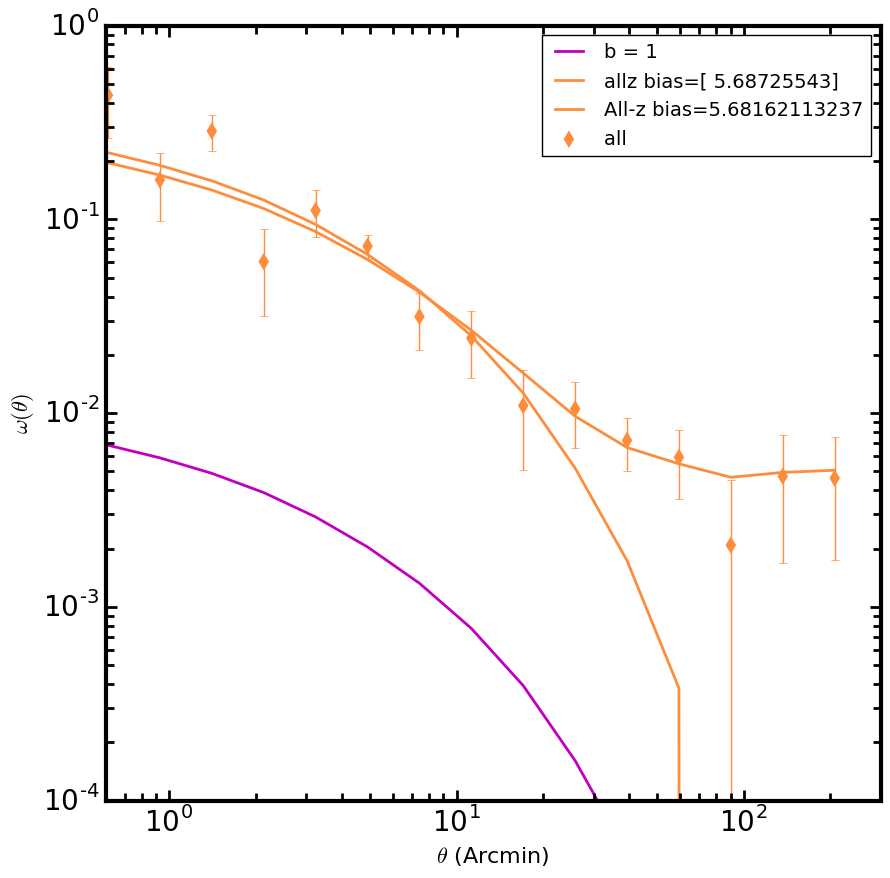

In [10]:
#Plotting Parameters (Replace with Group code call!)
params = {'legend.fontsize': 16, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':8, 'xtick.minor.size':6, 'ytick.major.size':8, 'ytick.minor.size':6}
plt.rcParams.update(params)
plt.rc("axes", linewidth=3.0)


plt.figure(1,figsize=[10,10])

plt.scatter(separation[0],wnames[0],s = 80,color='#fd8d3c', marker = 'd',edgecolor='None',label=r'all ')
plt.errorbar(separation[0],wnames[0],yerr=sigma[0]**0.5,elinewidth=1,fmt=',',color='#fd8d3c')

'''
plt.scatter(separation[1]+0.1*np.asarray(separation[1]),wnames[1],s = 80,color='#1a9641',marker = 's', edgecolor='None',label='obj1')
plt.errorbar(separation[1]+0.1*np.asarray(separation[1]),wnames[1],yerr=sigma[1]**0.5,elinewidth=1,fmt=',',color='#1a9641')

plt.scatter(separation[2]+0.2*np.asarray(separation[2]),wnames[2],s = 80,color = '#a6d96a', marker = 'o',edgecolor='None',label='obj2')
plt.errorbar(separation[2]+0.2*np.asarray(separation[2]),wnames[2],yerr=sigma[2]**0.5,elinewidth=1,fmt=',',color='#a6d96a')

plt.scatter(separation[3]+0.3*np.asarray(separation[3]),wnames[3],s = 80,color = 'b', marker = 'o',edgecolor='None',label='z<4.5')
plt.errorbar(separation[3]+0.3*np.asarray(separation[3]),wnames[3],yerr=sigma[3]**0.5,elinewidth=1,fmt=',',color='b')

plt.scatter(separation[4]+0.4*np.asarray(separation[4]),wnames[4],s = 80,color = 'm', marker = 'o',edgecolor='None',label='z<4')
plt.errorbar(separation[4]+0.4*np.asarray(separation[4]),wnames[4],yerr=sigma[4]**0.5,elinewidth=1,fmt=',',color='m')
'''
# Bias = 1 model
plt.plot(separation[0],1**2*Limbera(separation[0]),linewidth = 2,color = 'm',label='b = 1')

#No Stellar contamination in fit
plt.plot(separation[0],La,linewidth = 2,color = '#fd8d3c',label='allz bias=%s'%allzbias)
#plt.plot(separation[1],Ll,linewidth = 2,color = '#1a9641',label='obj1 bias=%s'%lowzbias)
#plt.plot(separation[2],Lh,linewidth = 2,color = '#a6d96a',label='obj2 bias=%s'%highzbias)
#plt.plot(separation[3],Le,linewidth = 2,color = 'b',label='z<4.5 bias=%s'%ezbias)
#plt.plot(separation[4],Lc,linewidth = 2,color = 'm',label='z<4 bias=%s'%acutbias)


#With Stellar contamination in fit
plt.plot(separation[0],Las,linewidth = 2,color = '#fd8d3c',label='All-z bias=%s'%allzb[0])
#plt.plot(separation[1],Lls,linewidth = 2,color = '#1a9641',label='Low-z bias=%s'%lowzb[0])
#plt.plot(separation[2],Lhs,linewidth = 2,color = '#a6d96a',label='High-z bias=%s'%highzb[0])

#plt.plot(thet,M2007,linewidth=2,linestyle='--',dashes = [8,4,8,4], color = 'k',label = 'Myers2007 all scale')

#plt.axvline(4)
#plt.axvline(25)
plt.xlim(0.6,300)
plt.ylim(10**-4,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend(fontsize = 14, scatterpoints=1)
#plt.savefig('/Users/johntimlin/Highz_Clustering/Angular_Clustering_Final/model_comparison.png')

plt.show()

In [36]:
def Power(T,alpha,delta):
    f = alpha * np.asarray(T)**-delta
    return f

In [37]:
#Fit the power law
mdlg = (np.asarray(th)>9) & (np.asarray(th)<100)
fit, cov = curve_fit(Power, np.asarray(separation[0])[mdlg], np.asarray(wnames[0])[mdlg])#, bounds=([0,0.],[np.inf,9.9e-3]))
newdel = fit[1]
print newdel

1.03206395458


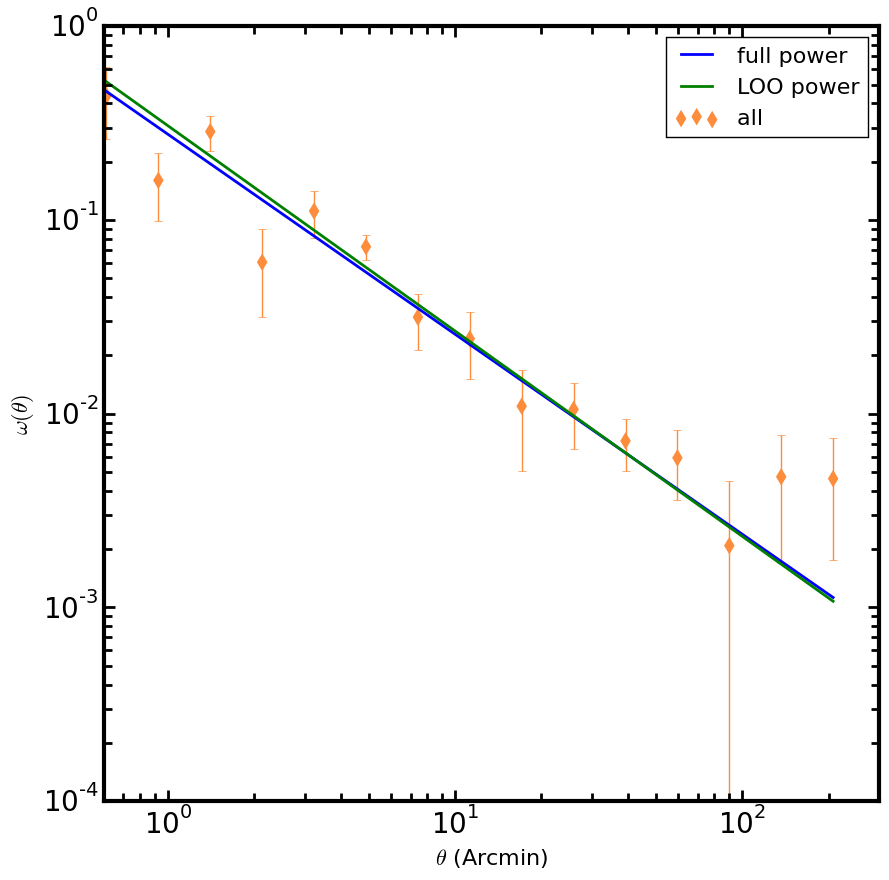

In [43]:
plt.figure(2,figsize=[10,10])
plt.scatter(separation[0],wnames[0],s = 80,color='#fd8d3c', marker = 'd',edgecolor='None',label=r'all ')
plt.errorbar(separation[0],wnames[0],yerr=sigma[0]**0.5,elinewidth=1,fmt=',',color='#fd8d3c')
plt.plot(separation[0],Power(separation[0],fit[0],fit[1]),linewidth = 2, label = 'full power')
plt.plot(separation[0],Power(separation[0],0.30667321168287631, 1.0595227152875821),linewidth = 2, label = 'LOO power')

plt.xlim(0.6,300)
plt.ylim(10**-4,1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\theta$ (Arcmin)',fontsize = 16)
plt.ylabel(r'$\omega (\theta)$',fontsize = 16)
plt.legend()
plt.show()

In [ ]:
[1.0644235005316889, 1.0636116687316384, 1.0619996695472016, 1.0600324884724108]
[0.30971099645963135, 0.3102474464912422, 0.30931558414106303, 0.30650720977614948]